In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights

In [3]:
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [4]:
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [9]:
# load data points
data = pd.read_csv('irisregression.csv')
sepal = np.array(data.sepall)
petal = np.array(data.petall)

In [10]:
#preparing and add 1 in bill
msepal = np.mat(sepal)
mpetal = np.mat(petal)
m= np.shape(msepal)[1]
one = np.mat(np.ones(m))
X= np.hstack((one.T,msepal.T))

In [11]:
#set k here
ypred = localWeightRegression(X,mpetal,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]

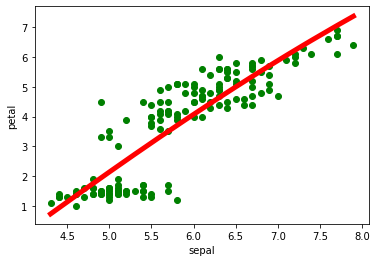

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(sepal,petal, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('sepal')
plt.ylabel('petal')
plt.show();